<a href="https://colab.research.google.com/github/Chakita/Face_Mask_detector/blob/master/overlay_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.6/dist-packages (0.5.3)


162


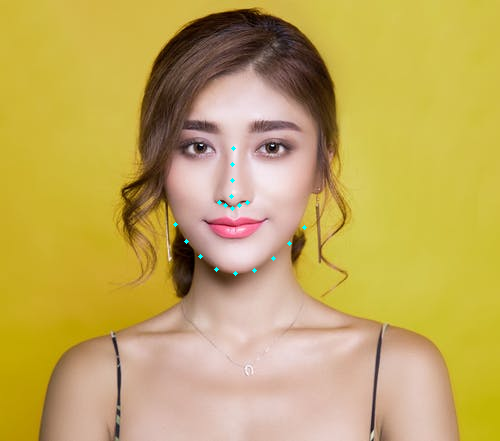

In [4]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow
detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
image=cv2.imread("/content/face.jpeg")
image=imutils.resize(image,width=500)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
faces=detector(gray)
REQUIRED_LANDMARKS=list(range(27,36))+list(range(4,13))
for face in faces:
  x1=face.left()
  x2=face.right()
  y1=face.top()
  y12=face.bottom()
  landmarks=predictor(gray,face)
  print(landmarks.part(0).x)
  for n in REQUIRED_LANDMARKS:
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    cv2.circle(image,(x,y),2,(255,255,0),-1)
cv2_imshow(image)    



In [5]:
from math import sqrt
def calc_dist(x1,y1,x2,y2):
  dist=sqrt((x2-x1)**2+(y2-y1)**2)
  return dist

In [8]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import os
from google.colab.patches import cv2_imshow

def put_mask(file_lst,base_pth): 
  over_img=cv2.imread("fm.png",-1)
  og_mask=over_img[:,:,3]
  og_mask_inv=cv2.bitwise_not(og_mask)
  img_mask=over_img[:,:,0:3]
  mask_h,mask_w=img_mask.shape[:2]
  og_ratio=(mask_h/mask_w)
  detector=dlib.get_frontal_face_detector()
  predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  for img in file_lst:
    image=cv2.imread(os.path.join(base_pth,img))
    image=imutils.resize(image,width=500)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=detector(gray)
    for face in faces:
      landmarks=predictor(gray,face)
      xh1,yh1=landmarks.part(27).x,landmarks.part(27).y
      xh2,yh2=landmarks.part(8).x,landmarks.part(8).y
      xw1,yw1=landmarks.part(2).x,landmarks.part(2).y
      xw2,yw2=landmarks.part(14).x,landmarks.part(14).y
      face_width=calc_dist(xw1,yw1,xw2,yw2)
      face_height=calc_dist(xh1,yh1,xh2,yh2)
      face_ratio=face_height/face_width
      new_mask_width=int(face_width)
      new_mask_height=int(new_mask_width*og_ratio)+int(30*face_ratio)
      new_mask=cv2.resize(img_mask,(new_mask_width,new_mask_height),interpolation=cv2.INTER_AREA)
      mask=cv2.resize(og_mask,(new_mask_width,new_mask_height),interpolation=cv2.INTER_AREA)
      mask_inv=cv2.resize(og_mask_inv,(new_mask_width,new_mask_height),interpolation=cv2.INTER_AREA)
      y1=landmarks.part(17).y
      y2=y1+new_mask_height
      x1=xw1
      x2=xw1+new_mask_width
      roi=image[y1:y2,x1:x2]
      roi_bg=cv2.bitwise_and(roi,roi,mask=mask_inv)
      roi_fg=cv2.bitwise_and(new_mask,new_mask,mask=mask)
      image[y1:y2,x1:x2]=cv2.add(roi_bg,roi_fg)
      cv2_imshow(image)
  

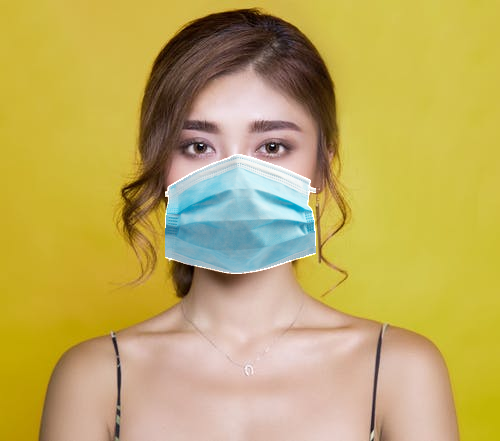

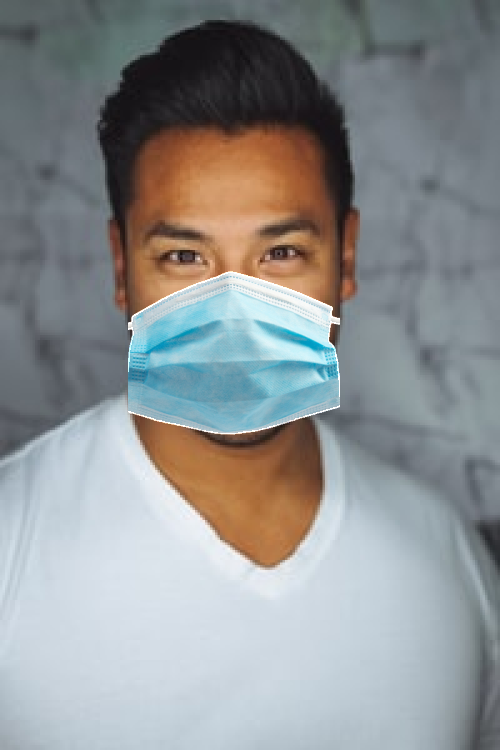

In [9]:
file_lst=["face.jpeg","face3.jpg"]
base_pth="/content"
put_mask(file_lst,base_pth)